In [ ]:
# Load pandas to read the excel into a dataframe and manipulate the data
import pandas as pd
import numpy as np

# Load the plotting libraries
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the Dataset from the ONS.GOV.UK Website
The following section checks if the dataset has already been downloaded and if not, it downloads it.

The dataset can be found on this link: [https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/trafficcameraactivity]()

In [ ]:
%%bash
FILE=./trafficcamerasdataset.xlsx
URL=https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/datasets/trafficcameraactivity/2021/trafficcamerasdataset.xlsx
[[ ! -f "$FILE" ]] && wget -O $FILE $URL

--2021-04-20 19:31:03--  https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/datasets/trafficcameraactivity/2021/trafficcamerasdataset.xlsx
Resolving www.ons.gov.uk (www.ons.gov.uk)... 104.20.31.77, 172.67.34.168, 104.20.32.77, ...
Connecting to www.ons.gov.uk (www.ons.gov.uk)|104.20.31.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘./trafficcamerasdataset.xlsx’

     0K .......... .......... .......... .......... ..........  486K
    50K .......... .......... .......... .......... ..........  496K
   100K .......... .......... .......... .......... ..........  497K
   150K .......... .......... .......... .......... .......... 13.0M
   200K .......... .......... .......... .......... .......... 14.7M
   250K .......... .......... ......                           13.3M=0.3s

2021-04-20 19:31:04 (883 KB/s) - ‘./trafficcamerasdataset.xlsx’ sa

# Load the Dataset Using Pandas
This section loads the dataset from excel to a DataFrame using a library called pandas. Pandas is a library for manipulating data.

Since we are only interested in the 'Seasonally adjusted' data, we are passing the name of the sheet that we want load to the pd.read_excel function. 

We also specify that the NA values (Null values) in excel are represented using an asterisk '*'.


In [ ]:
DATASET_NAME = "trafficcamerasdataset.xlsx"
SHEET_NAME = "Seasonally adjusted"

# Load the dataset
# Note: The excel data represents the NA values with an asterisk '*' so we have to tell
# pandas to identify these values as NAs (null values) to facilitate the work later. 
raw_dataset = pd.read_excel(DATASET_NAME, sheet_name=SHEET_NAME, na_values=['*'])

# Display the first 5 rows
raw_dataset.head(5)

,Unnamed: 0,London,London.1,London.2,London.3,London.4,London.5,North East,North East.1,North East.2,North East.3,North East.4,North East.5,Northern Ireland,Northern Ireland.1,Northern Ireland.2,Northern Ireland.3,Northern Ireland.4,Northern Ireland.5,Southend,Southend.1,Southend.2,Southend.3,Southend.4,Southend.5,Greater Manchester,Greater Manchester.1,Greater Manchester.2,Greater Manchester.3,Greater Manchester.4,Greater Manchester.5,Reading,Reading.1,Reading.2,Reading.3,Reading.4,Reading.5
0,NaT,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
1,NaT,* London series start 11/03/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* Northern Ireland series start 15/05/20,NaN,NaN,NaN,NaN,NaN,*Southend series start 07/05/20,NaN,NaN,NaN,NaN,NaN,* Greater Manchester series start 17/04/20,NaN,NaN,NaN,NaN,NaN,* Reading series start 07/05/20,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,# Suppressed for disclosure,NaN,NaN,NaN,NaN,NaN,# Suppressed for disclosure,NaN,NaN,NaN,NaN,NaN,# Suppressed for disclosure,NaN,NaN,NaN,NaN,NaN,# Suppressed for disclosure,NaN,NaN,NaN,NaN
3,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,55198,20,2231,1077,5097,5279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,54869,24,2287,1162,4931,5936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fixing the format of the dataset
In this part we fix the format of the dataset that is caused by having multiple levels of columns (multi-index) and having notes after the columns that pandas cannot interpret properly.
We also remove the columns that are unecessary for this project, rename the columns properly, and remove any rows that does not have any data.

In [ ]:
# Remove all columns that are not related to London
# we will do this because our analysis concerns london only
raw_dataset = raw_dataset.loc[:, :"London.5"]

# Use the values from the first row as the name of the columns
# ex.: Cars 	Motorbikes 	Buses 	Trucks 	Vans 	Pedestrians & cyclists
raw_dataset.columns = ['Date', *list(raw_dataset.iloc[0, 1:])]

# Drop the first three rows because we don't need them
# they only contain notes and the name of the columns
raw_dataset = raw_dataset.iloc[3:]

raw_dataset.head()

,Date,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
3,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop any rows that have NA values in all its columns (except the date column)
# This removes any dates on which no data has been collected
raw_dataset = raw_dataset.dropna(thresh=6, subset=raw_dataset.columns[1:])

raw_dataset.head()

,Date,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
13,2020-03-11,290280,522,19046,19589,42208,53608
14,2020-03-12,286269,477,18362,18331,40382,47063
15,2020-03-13,284431,517,19019,18789,39754,52958
16,2020-03-14,314084,472,18370,18195,40524,45815
17,2020-03-15,317517,462,17722,17257,40527,42101


In [ ]:
# Change all the columns after the Date column to Int32
raw_dataset[raw_dataset.columns[1:]] = raw_dataset[raw_dataset.columns[1:]].astype('int32')

# Change the data type of the Date column to datetime64
raw_dataset['Date'] = pd.to_datetime(raw_dataset['Date'])

raw_dataset.head()

,Date,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
13,2020-03-11,290280,522,19046,19589,42208,53608
14,2020-03-12,286269,477,18362,18331,40382,47063
15,2020-03-13,284431,517,19019,18789,39754,52958
16,2020-03-14,314084,472,18370,18195,40524,45815
17,2020-03-15,317517,462,17722,17257,40527,42101


In [ ]:
# Display a summary of the dataset. The count should be the same for all the columns.
# If the count is not the same, it means that a column has NA values.
if raw_dataset.isna().sum().sum() > 0:
  print(f"WARNING: The dataset still contains NaN values!")
raw_dataset.describe(datetime_is_numeric=True, include='all')

,Date,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
count,397,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2020-09-25 00:00:00.000002304,225605.596977,560.612091,15536.881612,15229.425693,32397.176322,35088.627204
min,2020-03-11 00:00:00,117763.000000,215.000000,1654.000000,1907.000000,7386.000000,15668.000000
25%,2020-06-18 00:00:00,187467.000000,463.000000,14274.000000,13469.000000,27695.000000,28985.000000
50%,2020-09-25 00:00:00,229425.000000,567.000000,15500.000000,15710.000000,33513.000000,35555.000000
75%,2021-01-02 00:00:00,265445.000000,665.000000,17046.000000,17317.000000,37755.000000,40914.000000
max,2021-04-11 00:00:00,317517.000000,901.000000,19760.000000,19702.000000,42757.000000,56760.000000
std,NaN,43052.841153,133.953202,1855.827530,2700.078113,6351.634288,7759.777769


In [ ]:
date_time_index = pd.date_range(start=raw_dataset['Date'].min(), end=raw_dataset['Date'].max(), freq='D')
indexed_dataset = raw_dataset.set_index('Date')
indexed_dataset = indexed_dataset.reindex(date_time_index, method='bfill')
indexed_dataset.index.name = 'Date'
indexed_dataset.head()

,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
Date,,,,,,
2020-03-11,290280,522,19046,19589,42208,53608
2020-03-12,286269,477,18362,18331,40382,47063
2020-03-13,284431,517,19019,18789,39754,52958
2020-03-14,314084,472,18370,18195,40524,45815
2020-03-15,317517,462,17722,17257,40527,42101


In [ ]:
# Create a flattened (stacked) dataframe where each value for each date and for
# every category of traffic data is on a seperate row.
flat_dataset = raw_dataset.set_index('Date').stack().reset_index()
flat_dataset.columns = ['Date', 'Category', 'Value']
flat_dataset.head()

,Date,Category,Value
0,2020-03-11,Cars,290280
1,2020-03-11,Motorbikes,522
2,2020-03-11,Buses,19046
3,2020-03-11,Trucks,19589
4,2020-03-11,Vans,42208


# Data Exploration
In the following steps, we will start exploring the data to better understand how the data is distributed, what are its charasteristics, whether outliers exist, whether imputations should be made, etc.

We begin with the [Initial Data Analysis (IDA) which is an integral part of the broader Exploratory Data Analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis).


## 1. Checking the data distribution
To visualise how data is distributed, we graph the data using a **boxplot** for each **category of traffic data**. 

The boxplot allows us to visualise the smallest and the largest data points, as well as the median, first quartile, third quartile and the inter quartile range (IQR).

Another important function of the boxplot is to identify and visualise the outliers.

<Figure size 432x288 with 0 Axes>

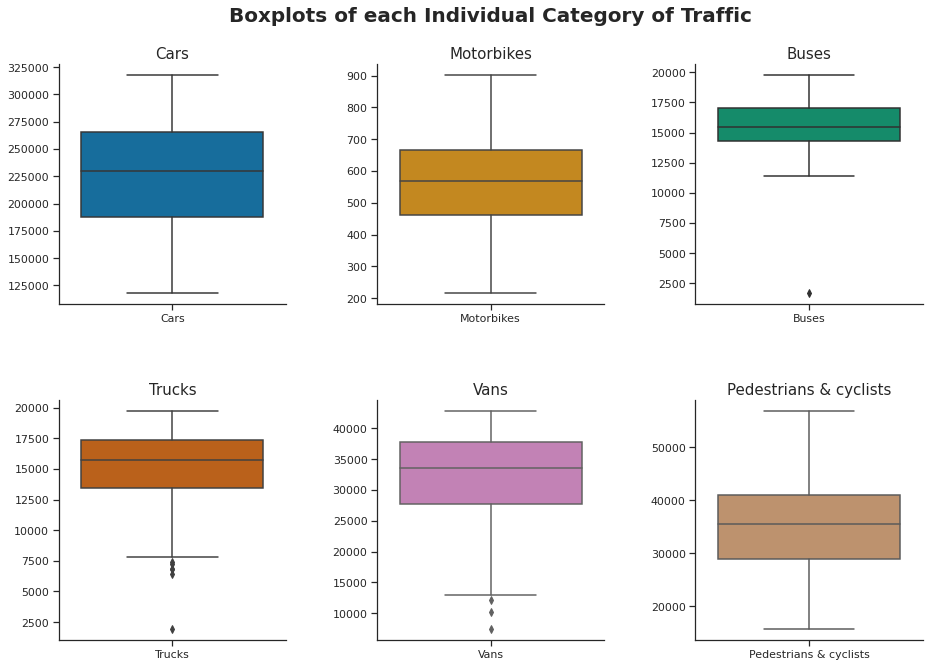

In [ ]:
sns.set_theme(style="ticks", palette="colorblind")
sns.despine(offset=10, trim=True)

color = sns.palettes.cycle(sns.color_palette('colorblind'))

fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, squeeze=False, figsize=(15,10))
axes = axes.flatten()
fig.suptitle("Boxplots of each Individual Category of Traffic", fontsize=20, fontweight='bold')

for index, detected_obj in enumerate(indexed_dataset.columns):
    ax = sns.boxplot(x='Category', y='Value', 
                     data=flat_dataset[flat_dataset.Category.str.fullmatch(detected_obj)], 
                     orient='v', ax=axes[index], color=next(color))
    sns.despine(offset=0, trim=False, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(detected_obj, fontsize=15)

# Adjust the plot's margins
plt.subplots_adjust(left=.1,
                    bottom=.1, 
                    right=.9, 
                    top=.9, 
                    wspace=.4, 
                    hspace=.4)

The above boxplots reveal important information about the data  and about the traffic during COVID.


1.   Data for Cars, Truck and Vans is negatively skewed
2.   Outliers exist in the data of Buses, Truck and Vans but Trucks and Buses have a very far outlier that requires addition investigation.
3.   Traffic is generated majorly by cars, then Pedestrians & Cyclists and Vans, then Buses, Trucks and finally the Motorbikes generate the least amount of traffic.



We can verify the mean of the traffic generated by each category over the entire period, by aggregating the data and sorting it as follows:

In [ ]:
# Show the mean amount of traffic generated by each category in a descending order.
flat_dataset.iloc[:,1:].groupby('Category').aggregate('mean').sort_values(by='Value', ascending=False).applymap(lambda x: int(x))

,Value
Category,
Cars,225605
Pedestrians & cyclists,35088
Vans,32397
Buses,15536
Trucks,15229
Motorbikes,560


To make sure that there is no inaccuracies in the data, we will look at the outliers that were identified by the boxplot to try to understand what happened and whether they are faulty and require deletion or they are correct and require no additional intervention.

To explore these values, we will use the [IQR method](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) which is the same as the one used in the boxplot.



In [ ]:
# Calculate the first quartile for each category of traffic
first_quartile = indexed_dataset.quantile(0.25)

# Calculate the third quartile for each category of traffic
third_quartile = indexed_dataset.quantile(0.75)

# Calculate the IQR
iqr = third_quartile - first_quartile

# Set the threshold above and below which, any values should be considered 
# as outliers
lower_outlier_threshold = first_quartile - (1.5 * iqr)
upper_outlier_threshold = third_quartile + (1.5 * iqr)

# Create the mask that will be used to hide all values that are not considered
# as outliers and show only the outliers.
iqr_mask = (indexed_dataset < lower_outlier_threshold) | (indexed_dataset > upper_outlier_threshold)

# Display a table that shows the outliers
indexed_dataset[iqr_mask].dropna(how='all').dropna(how='all', axis=1)

,Buses,Trucks,Vans
Date,,,
2020-04-10,NaN,6863.0,12150.0
2020-04-13,NaN,6460.0,10169.0
2020-05-08,NaN,7391.0,NaN
2020-05-25,NaN,7241.0,NaN
2020-12-25,1654.0,1907.0,7386.0
2021-01-01,NaN,6843.0,NaN


The table above shows the values of the outliers and their dates. When the dates are cross-checked with the [holidays in the UK](https://inews.co.uk/news/uk/bank-holiday-2020-when-next-august-monday-uk-holidays-378790), we notice that the outliers fall exactly on these days. 

The following list shows the holidays that correspond the dates where outliers were identified:
- 2020-04-10: Good Friday
- 2020-04-13: Easter Monday
- 2020-05-08: Early May bank holiday
- 2020-05-25: Spring bank holiday
- 2020-12-25: Christmas Day
- 2021-01-01: New Year’s Day

The conclusion is that it is completely normal for traffic to be low on days where businesses are closed and people are not working. This is especially true for Vans, and Trucks. It's also normal for the traffic of the Buses to be very low on Christmas Day because the bus network does not operate [except two special routes](https://www.morebus.co.uk/christmas) (m1 and m2).

This means that the outliers are not inaccurate and consequently, we do not need to impute or modify them.


---



## 2. Labeling the Data

In order to get better insights form the data, and because the dataset is a time-series, labeling the data can be very helpful in understanding the traffic of each caregory at each phase of lockdown and no-lockdown. 

Labeling can also provide a visual reference to enable an easier comparision beteween different time periods.

Finally, by labeling the data, we can start identifying correlations between different traffic categories at different phases of lockdowns and no-lockdowns, that are otherwise impossible if we treat the whole time-series as one uniform period.

The timeline of lockdowns in the UK is as follows [insert citation]:

**First Lockdown**
- 23 March: Prime Minister Boris Johnson announces the first UK lockdown. Movement is restraint to limited reasons such as food shopping, exercise once per day, medical need, and essential travel.

- 4 July: Lockdown restrictions are eased across England, non-essential shops reopen.


**Second Lockdown**
- 31 October: PM Boris Johnson announces another national lockdown for four weeks, with the closure of hospitality and non-essential shops.
- 2 December: England’s national lockdown comes to an end and is replaced by a strengthened three-tier system.

**Third Lockdown**
- 4 January 2021: Mr Johnson announces a third national lockdown for England.
- 12 April: [Step 2 of the roadmap](https://www.lbc.co.uk/news/explained/roadmap-out-of-lockdown-key-dates-steps-1-2-3-4/) out of lockdown begins.

In this part we will add labels to the data to represent the different periods, before, during and after the lockdown.


In [ ]:
lockdown_1 = pd.Interval(pd.Timestamp('2020-03-23'), pd.Timestamp('2020-07-04'), closed='both')
lockdown_2 = pd.Interval(pd.Timestamp('2020-10-31'), pd.Timestamp('2020-12-02'), closed='both')
lockdown_3 = pd.Interval(pd.Timestamp('2021-01-04'), pd.Timestamp('2021-04-12'), closed='both')

pre_lockdown_1 = lockdown_1.left - pd.Timedelta(days=1)
post_lockdown_1 = lockdown_1.right + pd.Timedelta(days=1)

pre_lockdown_2 = lockdown_2.left - pd.Timedelta(days=1)
post_lockdown_2 = lockdown_2.right + pd.Timedelta(days=1)

pre_lockdown_3 = lockdown_3.left - pd.Timedelta(days=1)

indexed_dataset.loc[:pre_lockdown_1, 'Label'] = 'Pre-Lockdown 1'
indexed_dataset.loc[:pre_lockdown_1, 'Label 2'] = 'Normal'
indexed_dataset.loc[lockdown_1.left:lockdown_1.right, 'Label'] = 'Lockdown 1'
indexed_dataset.loc[lockdown_1.left:lockdown_1.right, 'Label 2'] = 'Lockdown 1'


indexed_dataset.loc[post_lockdown_1:pre_lockdown_2, 'Label'] = 'Pre-Lockdown 2'
indexed_dataset.loc[post_lockdown_1:pre_lockdown_2, 'Label 2'] = 'Normal'
indexed_dataset.loc[lockdown_2.left:lockdown_2.right, 'Label'] = 'Lockdown 2'
indexed_dataset.loc[lockdown_2.left:lockdown_2.right, 'Label 2'] = 'Lockdown 2'

indexed_dataset.loc[post_lockdown_2:pre_lockdown_3, 'Label'] = 'Pre-Lockdown 3'
indexed_dataset.loc[post_lockdown_2:pre_lockdown_3, 'Label 2'] = 'Normal'
indexed_dataset.loc[lockdown_3.left:lockdown_3.right, 'Label'] = 'Lockdown 3'
indexed_dataset.loc[lockdown_3.left:lockdown_3.right, 'Label 2'] = 'Lockdown 3'

indexed_dataset.head()

,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists,Label,Label 2
Date,,,,,,,,
2020-03-11,290280,522,19046,19589,42208,53608,Pre-Lockdown 1,Normal
2020-03-12,286269,477,18362,18331,40382,47063,Pre-Lockdown 1,Normal
2020-03-13,284431,517,19019,18789,39754,52958,Pre-Lockdown 1,Normal
2020-03-14,314084,472,18370,18195,40524,45815,Pre-Lockdown 1,Normal
2020-03-15,317517,462,17722,17257,40527,42101,Pre-Lockdown 1,Normal


In [ ]:
# Create a flattened (stacked) dataframe where each value for each date and for
# every category of traffic data is on a seperate row.
flat_dataset = indexed_dataset.reset_index().set_index(['Label', 'Label 2', 'Date']).stack().reset_index()
flat_dataset.columns = ['Label', 'Label 2', 'Date', 'Category', 'Value']
flat_dataset.head()

,Label,Label 2,Date,Category,Value
0,Pre-Lockdown 1,Normal,2020-03-11,Cars,290280
1,Pre-Lockdown 1,Normal,2020-03-11,Motorbikes,522
2,Pre-Lockdown 1,Normal,2020-03-11,Buses,19046
3,Pre-Lockdown 1,Normal,2020-03-11,Trucks,19589
4,Pre-Lockdown 1,Normal,2020-03-11,Vans,42208


## Smoothing the Data
In time-series, usually the values fluctuate considerably between each date and this can be difficult to interpret when plotting the data. The fluctuations are also not systematically important to visualise especially in the context of this project where we are looking at behaviour over long periods that is naturally expected to fluctuate rather than looking at small fluctuations that occur unexpectedly and that could have a significant effect. 

In [ ]:
for category in flat_dataset.Category.unique():
  smoothed_values = flat_dataset.loc[flat_dataset.Category == category, 'Value'].rolling(window=10, center=True).mean()
  flat_dataset.loc[flat_dataset.Category == category, 'Smoothed Value'] = smoothed_values

flat_dataset.dropna(inplace=False).head(5)

,Label,Label 2,Date,Category,Value,Smoothed Value
30,Pre-Lockdown 1,Normal,2020-03-16,Cars,267484,280324.7
31,Pre-Lockdown 1,Normal,2020-03-16,Motorbikes,501,526.1
32,Pre-Lockdown 1,Normal,2020-03-16,Buses,18048,18777.1
33,Pre-Lockdown 1,Normal,2020-03-16,Trucks,17955,18428.2
34,Pre-Lockdown 1,Normal,2020-03-16,Vans,38311,39852.1


## Preliminary Data Visualisation
With the data being ready to be used for further exploration, in this section we will visualise the time-series for each category of traffic using a libe plot, and also the correlations between the different traffic categories using scatter plots.

Afterwards, we will export the dataset in excel format to import it into Tableau and create more advanced visualisations.

<Figure size 432x288 with 0 Axes>

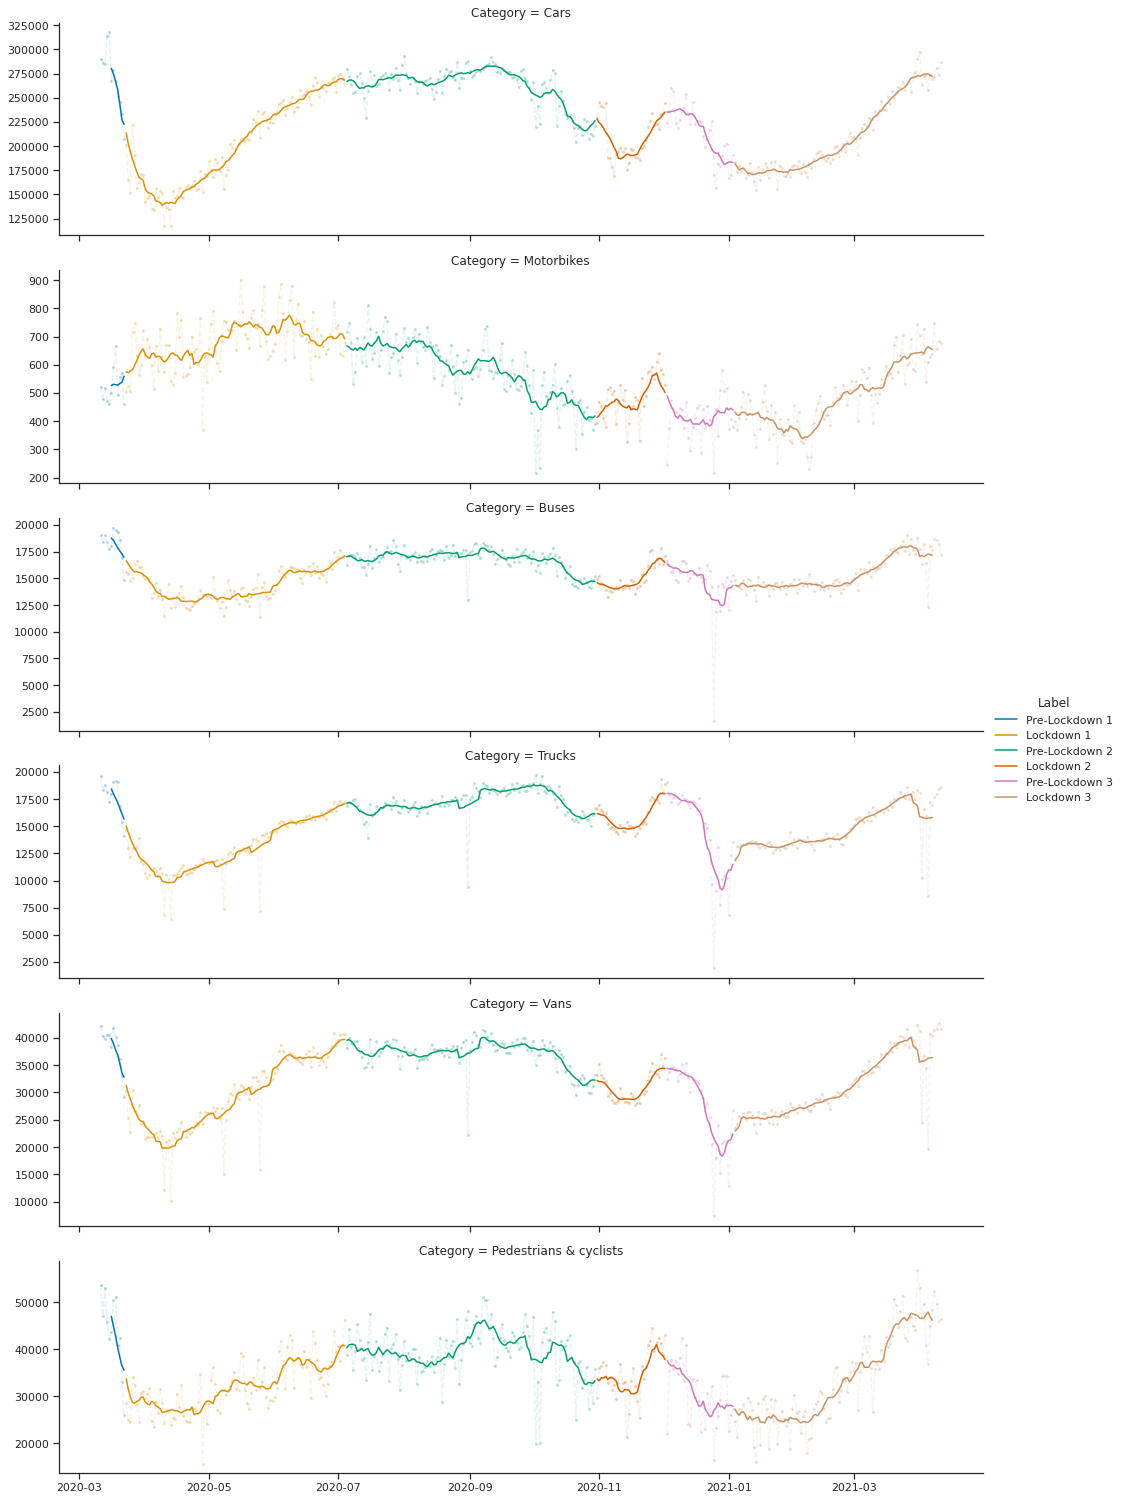

In [ ]:
sns.set_theme(style="ticks", palette="colorblind")
sns.despine(offset=10, trim=True)
# plt.figure(figsize=(15,5))
# sns.lineplot(x=indexed_dataset.index, y=indexed_dataset.Cars, hue=indexed_dataset.Label)

grid = sns.FacetGrid(flat_dataset, row="Category", hue="Label", sharey=False, sharex=True, height=3.5, aspect=4, legend_out=True, despine=True)
grid.map_dataframe(sns.lineplot, x="Date", y="Value", alpha=.3, marker='.', linestyle='')
grid.map_dataframe(sns.lineplot, x="Date", y="Value", alpha=.1, marker='', linestyle='--')
grid.map_dataframe(sns.lineplot, x="Date", y="Smoothed Value", alpha=1)
grid.add_legend()


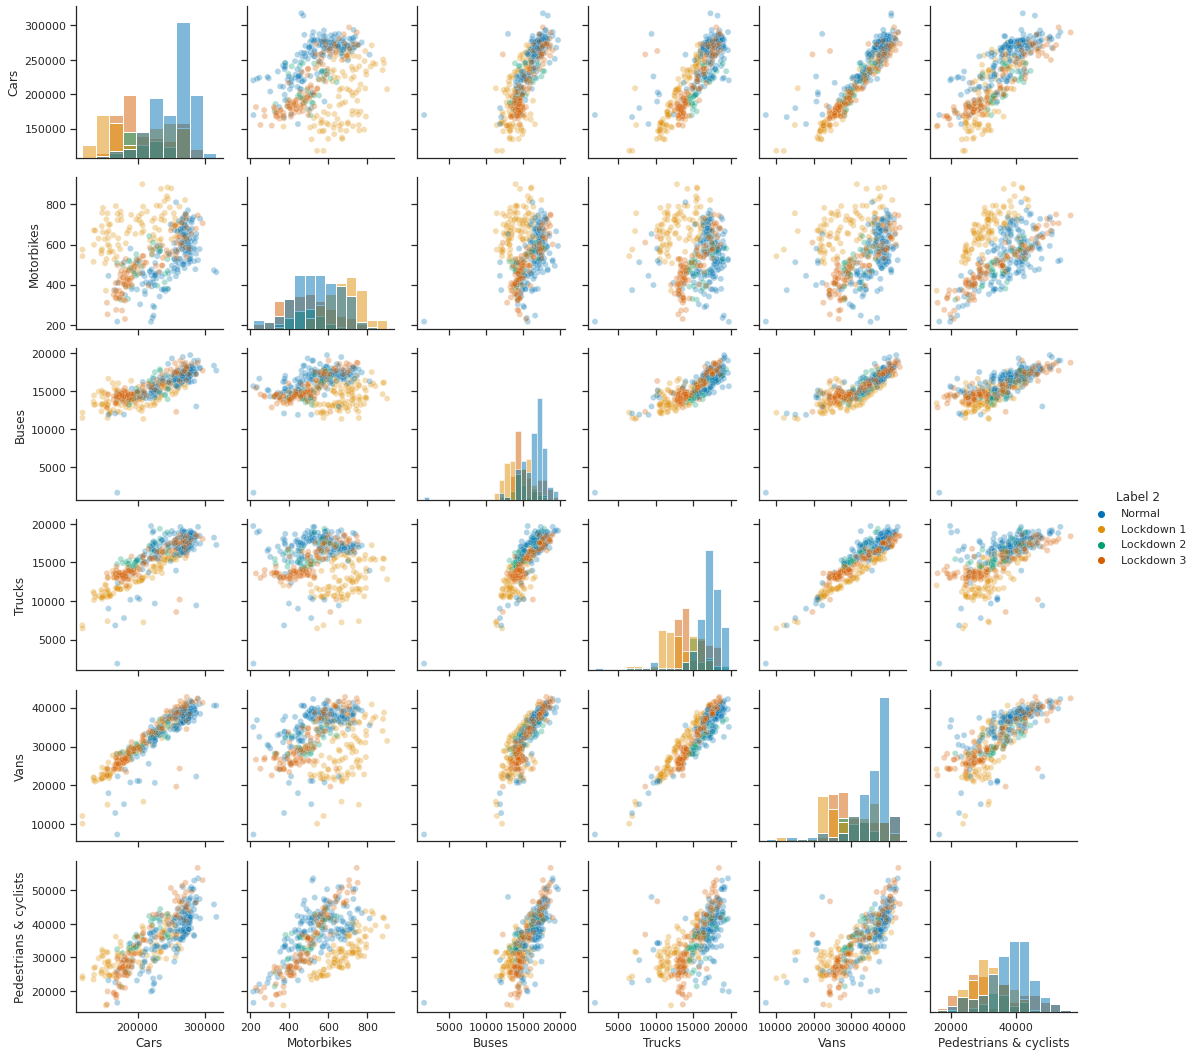

In [ ]:
g = sns.PairGrid(indexed_dataset, hue='Label 2')
g.map_diag(sns.histplot)

g.map_offdiag(sns.scatterplot, alpha=.3)
g.add_legend()

In [ ]:
indexed_dataset.corr()

,Cars,Motorbikes,Buses,Trucks,Vans,Pedestrians & cyclists
Cars,1.000000,0.327161,0.769006,0.799133,0.897419,0.802833
Motorbikes,0.327161,1.000000,0.245292,0.027979,0.318779,0.512825
Buses,0.769006,0.245292,1.000000,0.841217,0.849343,0.749620
Trucks,0.799133,0.027979,0.841217,1.000000,0.925985,0.646628
Vans,0.897419,0.318779,0.849343,0.925985,1.000000,0.771397
Pedestrians & cyclists,0.802833,0.512825,0.749620,0.646628,0.771397,1.000000


In [ ]:
dataset_to_export = flat_dataset.pivot(index=['Label', 'Label 2', 'Date'], columns='Category', values='Value').reset_index()
dataset_to_export.to_excel('exported_traffic_dataset.xlsx', index=False)

flat_dataset.to_excel('exported_flat_traffic_dataset.xlsx', index=False)

In [ ]:
flat_dataset

,Label,Label 2,Date,Category,Value,Smoothed Value
0,Pre-Lockdown 1,Normal,2020-03-11,Cars,290280,NaN
1,Pre-Lockdown 1,Normal,2020-03-11,Motorbikes,522,NaN
2,Pre-Lockdown 1,Normal,2020-03-11,Buses,19046,NaN
3,Pre-Lockdown 1,Normal,2020-03-11,Trucks,19589,NaN
4,Pre-Lockdown 1,Normal,2020-03-11,Vans,42208,NaN
...,...,...,...,...,...,...
2377,Lockdown 3,Lockdown 3,2021-04-11,Motorbikes,679,NaN
2378,Lockdown 3,Lockdown 3,2021-04-11,Buses,17229,NaN
2379,Lockdown 3,Lockdown 3,2021-04-11,Trucks,18569,NaN
2380,Lockdown 3,Lockdown 3,2021-04-11,Vans,41563,NaN


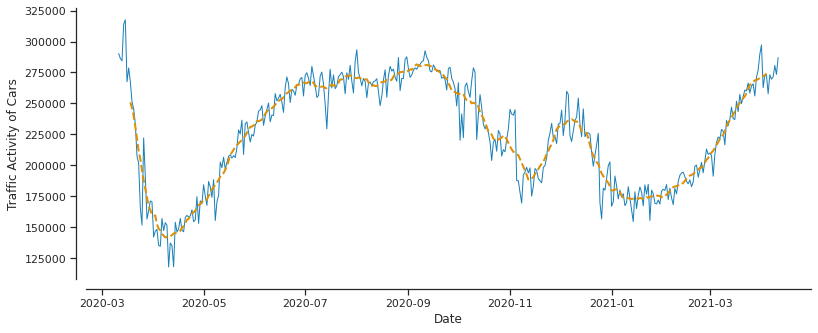

In [ ]:
plt.figure(figsize=(13,5))
sns.set_palette('colorblind')
ax = sns.lineplot(data=raw_dataset, x='Date', y='Cars', alpha=.9, linestyle='-', linewidth='1')
ax = sns.lineplot(data=raw_dataset, x='Date', 
                  y=raw_dataset.Cars.rolling(window=15, center=True).mean(),
                  linestyle='--', linewidth='2')
ax.set_ylabel('Traffic Activity of Cars')
sns.despine(offset=10, ax=ax)